In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine, text

## Подключение к базе данных и загрузка таблиц sql

In [25]:
db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
} 

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [26]:
engine = create_engine(connection_string)
del db_config
del connection_string

## Проведение первичного исследования таблиц

In [57]:
query = '''
SELECT *
FROM collisions
LIMIT 10;
'''

pd.DataFrame(engine.connect().execute(text(query)))

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00
5,4083097,0109,alameda,0.0,None,1,clear,ramp,small damage,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-18,02:18:00
6,4083092,1942,los angeles,1320.0,south,0,clear,highway,scratch,2,vehicle code violation,unsafe lane change,rear end,other motor vehicle,dry,normal,daylight,none,2009-01-21,10:30:00
7,4083096,1942,los angeles,200.0,south,0,clear,highway,scratch,3,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2009-01-21,08:55:00
8,4083100,1942,los angeles,2112.0,north,0,cloudy,highway,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2009-01-21,16:20:00
9,4083103,4313,santa clara,0.0,None,1,cloudy,None,scratch,2,vehicle code violation,None,broadside,other motor vehicle,wet,normal,dusk or dawn,functioning,2009-01-02,15:55:00


In [56]:
query = '''
SELECT *
FROM case_ids
LIMIT 10;
'''

pd.DataFrame(engine.connect().execute(text(query)))

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021
5,3899445,2021
6,3899446,2021
7,3899449,2021
8,3899450,2021
9,3899453,2021


In [31]:
query = '''
SELECT *
FROM vehicles
LIMIT 10;
'''

pd.DataFrame(engine.connect().execute(text(query)))

In [49]:
query = '''
SELECT *
FROM parties
LIMIT 10;
'''

pd.DataFrame(engine.connect().execute(text(query)))

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0.0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0.0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0.0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0.0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.0
5,43,3899481,2,road bumper,0,NaN,not applicable,not applicable,0.0
6,72,3899505,2,road bumper,0,NaN,not applicable,not applicable,0.0
7,73,3899505,3,road bumper,0,NaN,not applicable,not applicable,0.0
8,76,3899509,1,road bumper,0,NaN,had not been drinking,None,0.0
9,93,3981292,2,road bumper,0,NaN,had not been drinking,None,NaN


### Выводы
1. Все таблицы имеют данные для выполнения поставленных задач
2. Таблиц достаточно для выполнения поставленных задач
3. Все таблицы имеют общий ключ для связи между собой

##  Проведение статистического анализа факторов ДТП

In [51]:
query = '''
SELECT extract(month from collision_date) as month, count(*)
FROM collisions
GROUP BY month
ORDER BY month;
'''

collisions_per_month = pd.DataFrame(engine.connect().execute(text(query)))

In [52]:
collisions_per_month

,month,count
0,1,132044
1,2,128858
2,3,139581
3,4,130180
4,5,130316
5,6,102594
6,7,102227
7,8,104089
8,9,105159
9,10,112237


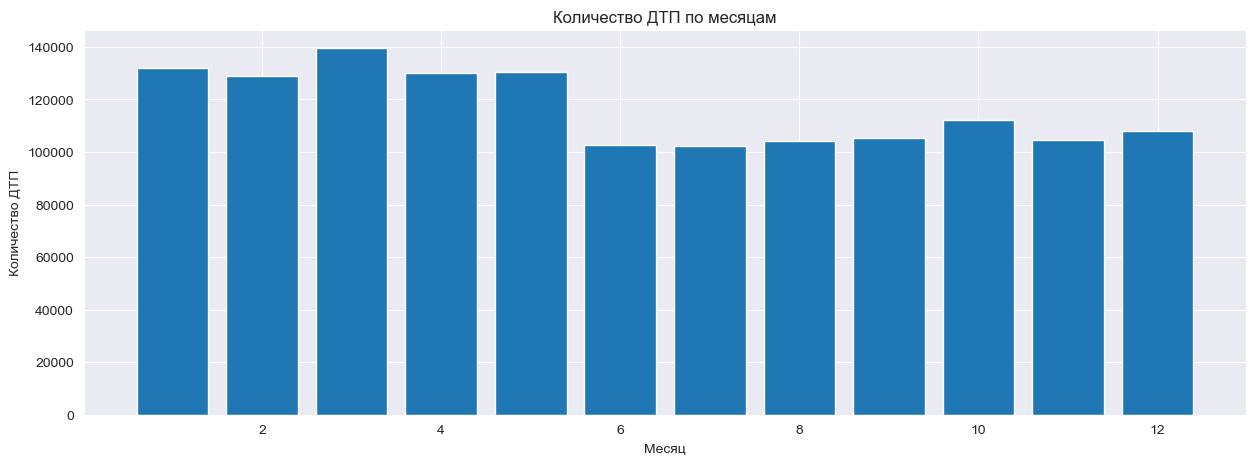

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.bar(collisions_per_month['month'], collisions_per_month['count'])
plt.title('Количество ДТП по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество ДТП')
plt.show()

### Количество ДТП по месяцам
* С января по май включительно самое большое количество аварий, примерно в одном диапозоне.
* Март является самым аварийным месяцем.
* С июня по декабрь включительно количество аварий примерно одинаковое и меньше, чем в первой половине года.
* Самое маленькое количество аварий в июле.

## Создание модели для оценки водительского риска

## Проведение анализ важности факторов ДТП

## Выводы